In [4]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

## TODO - DTALE - DATA Visulization library

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

In [34]:
df = pd.read_csv('Research Dataset/who_ambient_air_quality.csv')

In [9]:
df.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,3_Sear,IND,India,Chennai,2018,version 2022,NaN,30.0,NaN,NaN,91.0,NaN,NaN,"U.S. Department of State, United States Enviro...",https://www.airnow.gov/index.cfm?action=airnow...,9890427.0,NaN,13.087840,80.278470,1
1,3_Sear,IND,India,Solapur,2016,"version 2022, version 2018",NaN,39.0,NaN,NaN,99.0,NaN,NaN,"Central Pollution Control Board India, Environ...",NaN,985568.0,NaN,17.659919,75.906391,1
2,3_Sear,IND,India,Chennai,2019,version 2022,NaN,39.0,NaN,NaN,85.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",9890427.0,NaN,13.087840,80.278470,1
3,3_Sear,IND,India,Hyderabad,2019,version 2022,NaN,42.0,NaN,NaN,87.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",8943523.0,NaN,17.384050,78.456360,1
4,3_Sear,IND,India,Pune,2017,version 2022,NaN,43.0,NaN,NaN,NaN,NaN,NaN,"Central Pollution Control Board India, Environ...",http://www.cpcb.gov.in/CAAQM/,5727530.0,NaN,18.505320,73.823839,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41364 entries, 2018 to 2010
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          41364 non-null  object 
 1   iso3                41364 non-null  object 
 2   country_name        41364 non-null  object 
 3   city                41252 non-null  object 
 4   year                41364 non-null  int64  
 5   version             41219 non-null  object 
 6   pm10_concentration  28177 non-null  float64
 7   pm25_concentration  21566 non-null  float64
 8   no2_concentration   26704 non-null  float64
 9   pm10_tempcov        21344 non-null  float64
 10  pm25_tempcov        16114 non-null  float64
 11  no2_tempcov         22991 non-null  float64
 12  type_of_stations    29459 non-null  object 
 13  reference           40538 non-null  object 
 14  web_link            31983 non-null  object 
 15  population          17161 non-null  float64
 16  populat

In [14]:
# check null value percentage
df.isna().mean()*100

who_region              0.000000
iso3                    0.000000
country_name            0.000000
city                    0.270767
year                    0.000000
version                 0.350546
pm10_concentration     31.880379
pm25_concentration     47.862876
no2_concentration      35.441447
pm10_tempcov           48.399575
pm25_tempcov           61.043419
no2_tempcov            44.417851
type_of_stations       28.781066
reference               1.996906
web_link               22.679141
population             58.512233
population_source     100.000000
latitude                0.601973
longitude               0.609225
who_ms                  0.000000
dtype: float64

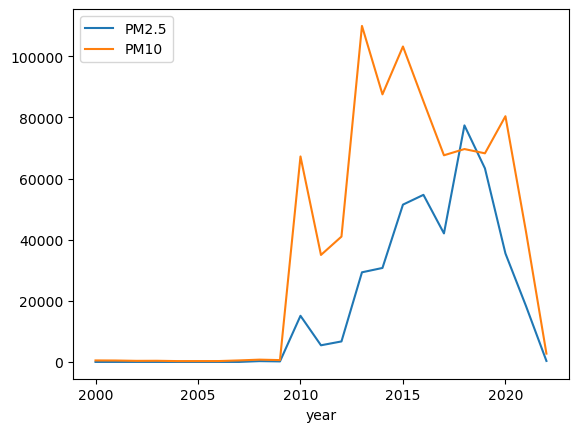

In [35]:
df.groupby(df.year)['pm25_concentration'].sum().plot(kind='line',label='PM2.5')
df.groupby(df.year)['pm10_concentration'].sum().plot(kind='line', label='PM10')
plt.legend(loc="upper left")
plt.show()

Since there are no data of PM10 and PM2.5 before year 2009. So those data should remove.

In [36]:
 # Delete all rows with column 'year' < 2009
df.drop(df[df.year < 2009].index, inplace=True)
df.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,3_Sear,IND,India,Chennai,2018,version 2022,NaN,30.0,NaN,NaN,91.0,NaN,NaN,"U.S. Department of State, United States Enviro...",https://www.airnow.gov/index.cfm?action=airnow...,9890427.0,NaN,13.087840,80.278470,1
1,3_Sear,IND,India,Solapur,2016,"version 2022, version 2018",NaN,39.0,NaN,NaN,99.0,NaN,NaN,"Central Pollution Control Board India, Environ...",NaN,985568.0,NaN,17.659919,75.906391,1
2,3_Sear,IND,India,Chennai,2019,version 2022,NaN,39.0,NaN,NaN,85.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",9890427.0,NaN,13.087840,80.278470,1
3,3_Sear,IND,India,Hyderabad,2019,version 2022,NaN,42.0,NaN,NaN,87.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",8943523.0,NaN,17.384050,78.456360,1
4,3_Sear,IND,India,Pune,2017,version 2022,NaN,43.0,NaN,NaN,NaN,NaN,NaN,"Central Pollution Control Board India, Environ...",http://www.cpcb.gov.in/CAAQM/,5727530.0,NaN,18.505320,73.823839,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41339 entries, 0 to 41363
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          41339 non-null  object 
 1   iso3                41339 non-null  object 
 2   country_name        41339 non-null  object 
 3   city                41227 non-null  object 
 4   year                41339 non-null  int64  
 5   version             41194 non-null  object 
 6   pm10_concentration  28152 non-null  float64
 7   pm25_concentration  21561 non-null  float64
 8   no2_concentration   26699 non-null  float64
 9   pm10_tempcov        21339 non-null  float64
 10  pm25_tempcov        16109 non-null  float64
 11  no2_tempcov         22986 non-null  float64
 12  type_of_stations    29434 non-null  object 
 13  reference           40513 non-null  object 
 14  web_link            31958 non-null  object 
 15  population          17136 non-null  float64
 16  populatio

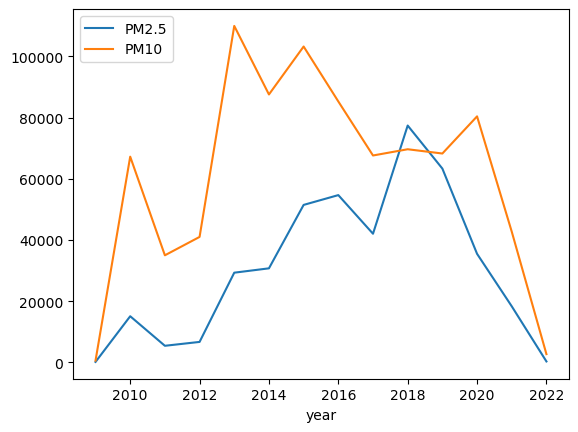

In [37]:
df.groupby(df.year)['pm25_concentration'].sum().plot(kind='line',label='PM2.5')
df.groupby(df.year)['pm10_concentration'].sum().plot(kind='line', label='PM10')
plt.legend(loc="upper left")
plt.show()